# new images

/tmp/ipykernel_804031/2671571162.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_empty, hist=False, rug=True, label='Empty')
/tmp/ipykernel_804031/2671571162.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_still, hist=False, rug=True, label='Still')


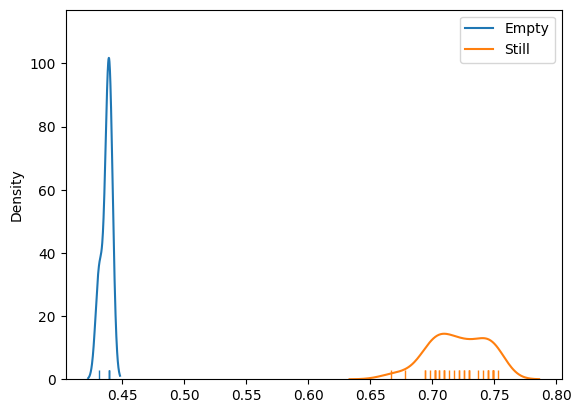

In [6]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/home/bule/projects/Dice/workspace/data/new_camera/empty"
images_empty = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_empty.append(img)
        

images_still = []       
path = "/home/bule/projects/Dice/workspace/data/new_camera/still"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_still.append(img)             
        

gray_images_empty = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_empty]
gray_images_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_still]


scores_empty =[(np.max(im )-np.median(im))/255 for im in gray_images_empty]
scores_still =[(np.max(im)-np.median(im))/255 for im in gray_images_still]

# Scores for moving and empty images

sns.distplot(scores_empty, hist=False, rug=True, label='Empty')
sns.distplot(scores_still, hist=False, rug=True, label='Still')

plt.legend()
plt.show()


# calibration 

In [12]:
import json

# Open the JSON file
with open("configuration/state_calibration.json") as file:
    data = json.load(file)
# Access the data in the JSON file
threshold = data["state_threshold"]
# Print the values
print("Threshold:", threshold)


def calibrate_state(calibration_file="configuration/state_calibration.json"):
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_EXPOSURE, 50)
        if not cap.isOpened():
                print("Cannot open camera")
                exit()
        
        images=[]
        images_captured = 0
        
        capture_dict={0:"one white die",
                    1:"two white dice",
                    2:"one red die",
                    3:"two red dice",
                    4:"one red die and one white die",
                    5:"two red dice and 2 white dice",
                    6:"empty scene",
                    7:"empty scene again",
                    8:"empty scene .. again ",
                    9:"empty scene .. last one!"}
        
        
        while images_captured>10:
            ret, frame = cap.read()
            grayscaleframe= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            txt_instructions=f"Press -Space-  to capture image with:\n {capture_dict[images_captured]}"
            cv2.putText(frame, txt_instructions, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.imshow('frame', frame)
            if cv2.waitKey(32) & 0xFF:
                images.append(grayscaleframe)
                images_captured +=1
                print("Image captured")
                
        images= [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
        
        scores =[(np.max(im )-np.median(im))/255 for im in images]

        sns.distplot(scores[-4:], hist=False, rug=True, label='Empty')
        sns.distplot(scores[:-4], hist=False, rug=True, label='Still')

        plt.legend()
        plt.show()
        
        


Threshold: 0.55


# old images

/tmp/ipykernel_804031/935713643.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_empty, hist=False, rug=True, label='Empty')
/tmp/ipykernel_804031/935713643.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_rolling, hist=False, rug=True, label='Rolling')
/t

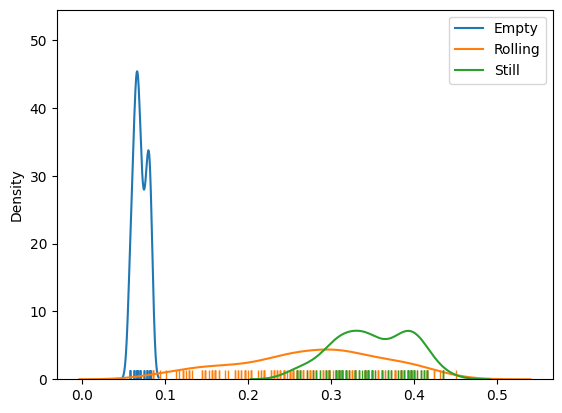

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

path = "/home/bule/projects/Dice/workspace/data/eyes2/empty"
images_empty = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_empty.append(img)
        
images_rolling=[]
path = "/home/bule/projects/Dice/workspace/data/eyes2/rolling"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_rolling.append(img)        
 
images_still = []       
path = "/home/bule/projects/Dice/workspace/data/eyes2/still"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_still.append(img)             
        

gray_images_empty = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_empty]
gray_images_rolling = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_rolling]
gray_images_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_still]


scores_empty =[(np.max(im )-np.median(im))/255 for im in gray_images_empty]
scores_rolling =[(np.max(im)-np.median(im))/255 for im in gray_images_rolling]
scores_still =[(np.max(im)-np.median(im))/255 for im in gray_images_still]

# Scores for moving and empty images

sns.distplot(scores_empty, hist=False, rug=True, label='Empty')
sns.distplot(scores_rolling, hist=False, rug=True, label='Rolling')
sns.distplot(scores_still, hist=False, rug=True, label='Still')

plt.legend()
plt.show()


In [8]:
from collections import deque

class SceneStateDetector1:
    def __init__(self, calibration_file='configuration/state_calibration.json', max_frames_stack=4,imshape=(480, 640)):
        
        with open(calibration_file) as f:
            calibration_dict = json.load(f)
        
        # TODO write calibration function to calculate the threshold and moving_treshold from the empty images IO for a calibration file
        self.threshold = calibration_dict['state_threshold']
        self.moving_treshold = calibration_dict['moving_threshold']
        self.state_stack_lock = False
        self.queue =deque(maxlen=max_frames_stack)
        self.imshape=imshape
        self.last_frame = np.zeros(self.imshape)
        
    def get_scene_state(self,frame):
        
        # input is a frame in one channel grayscale with 0-255 range
        framescaled=frame/ 255.
        
        self.capture=False
        # calculate score by subtracting background from the max pixel 
        score = (np.max(framescaled) - np.median(framescaled)) 
        
        # set difference to previous frame
        difference =np.linalg.norm(framescaled-self.last_frame) #np.sqrt((framescaled - self.last_frame)**2) #L2
        
        self.last_frame = framescaled
        
        print("score",score,"difference",difference)
        state = "undecided"
        # deciding wether a frame is empty or moving
        if score < self.threshold:
            state = "empty"
        
        if difference > self.moving_treshold and score > self.threshold:
            state = "moving"
        
        if difference < self.moving_treshold and score > self.threshold:
            state = "still"
        #  push it to the stack FIFO
        self.queue.append(state)
        
        # reseting the statelock by having other states in the stack 
        if all(state != "still" for state in self.queue):
            self.state_stack_lock =False
            
        # if all the frames in the stack are still and the state is not locked we can capture the image , indicated by return capture = True
        if all(state == "still" for state in self.queue) and not self.state_stack_lock:
            self.state_stack_lock = True
            self.capture = True
            state = "empty"
            return state , self.capture
        
        
        # retrun the state and the indicator for capturing the image
        return state , self.capture

-------------------------------------------------- new frame below


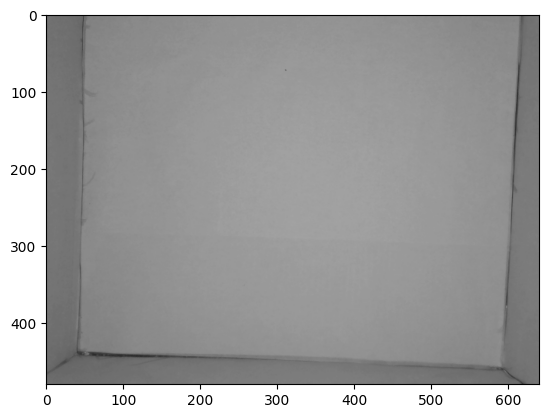

score 0.06274509803921569 difference 310.91445303944863
deque(['empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


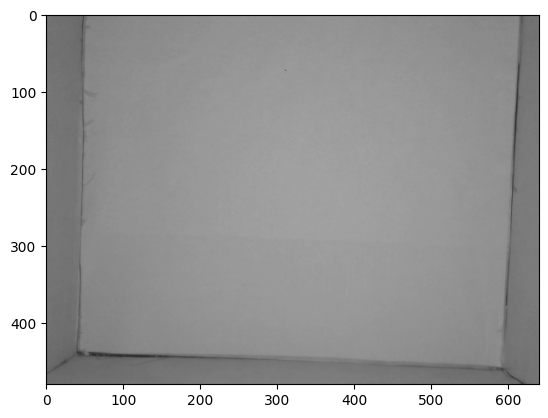

score 0.06666666666666665 difference 2.895323623543062
deque(['empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


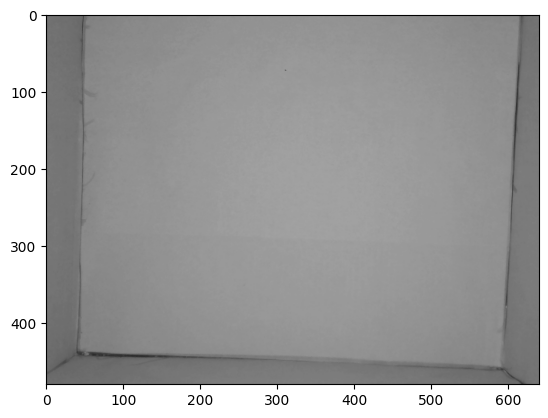

score 0.07058823529411773 difference 2.29552830770156
deque(['empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


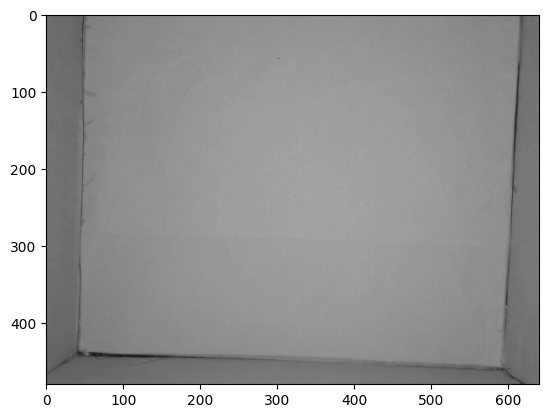

score 0.08235294117647063 difference 6.50151846930918
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


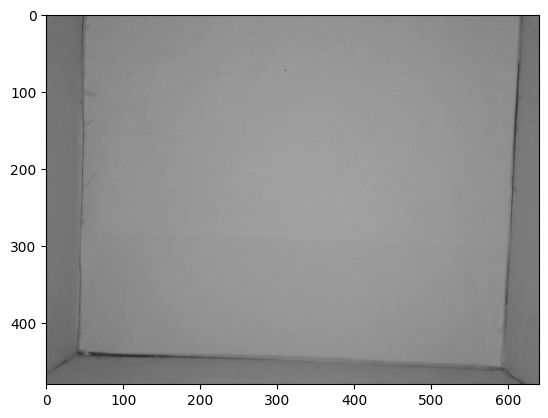

score 0.06666666666666665 difference 6.354852048615022
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


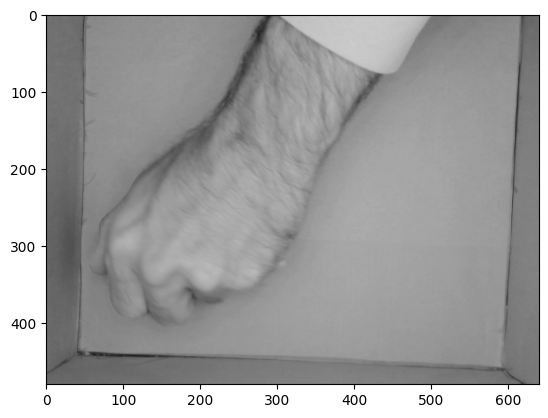

score 0.2313725490196078 difference 34.3389959608466
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


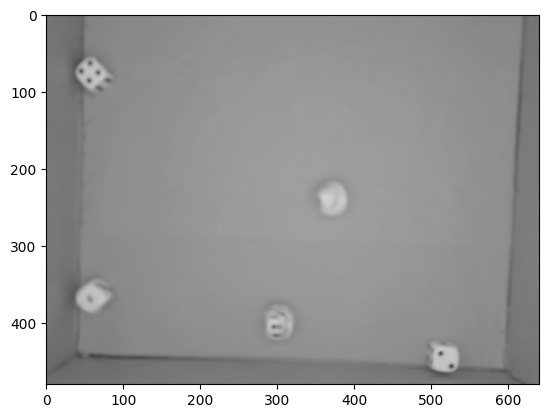

score 0.26274509803921564 difference 37.80049716001366
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


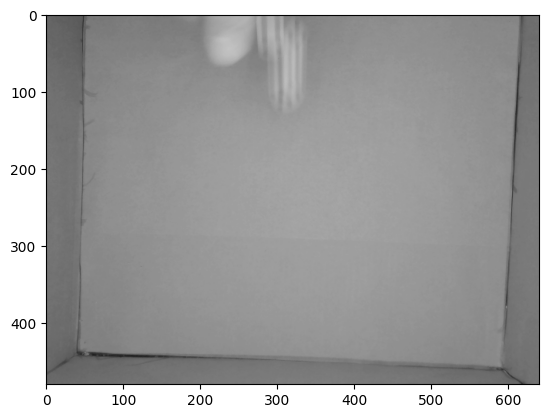

score 0.196078431372549 difference 20.49463166175996
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


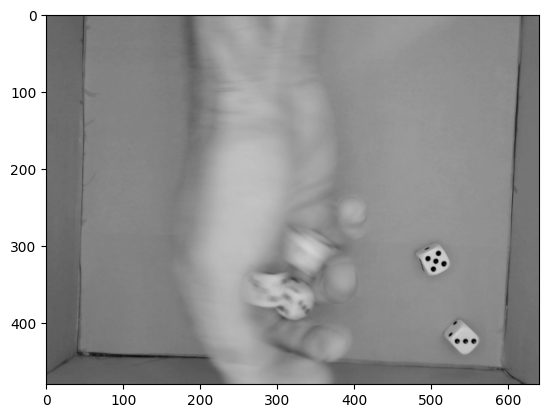

score 0.29803921568627456 difference 36.139049246357
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


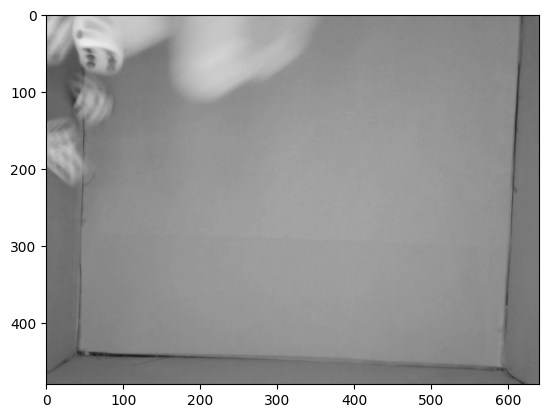

score 0.3568627450980393 difference 50.753465988846195
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


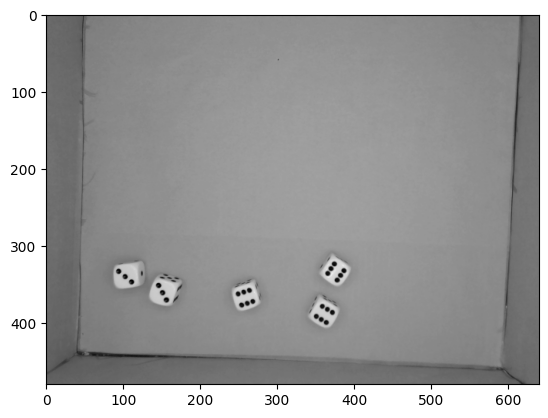

score 0.388235294117647 difference 41.37642821700419
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


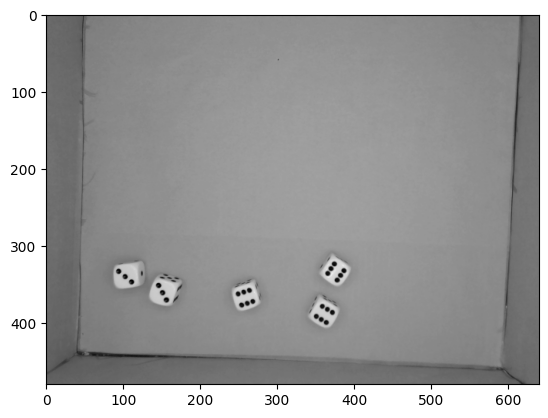

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


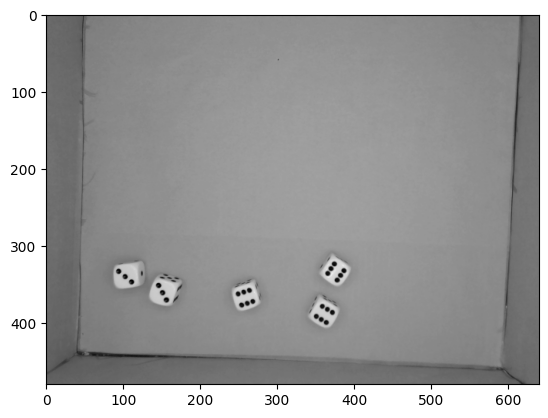

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


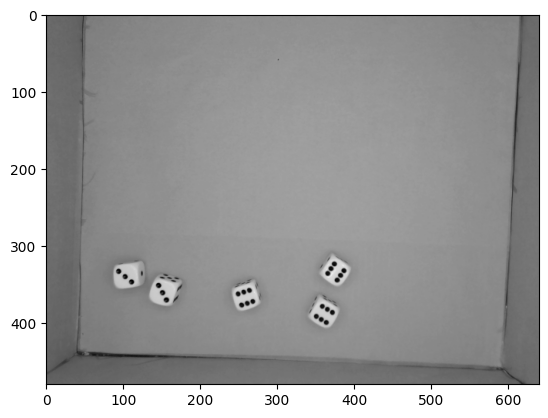

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


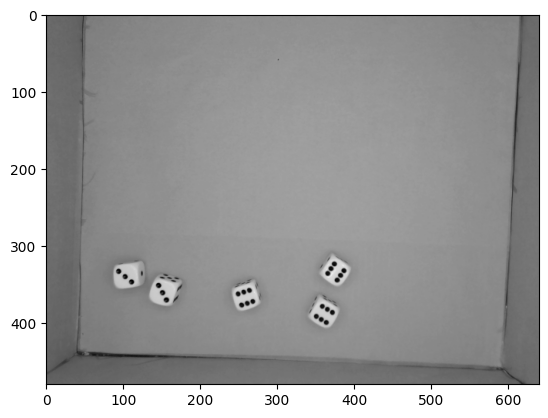

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


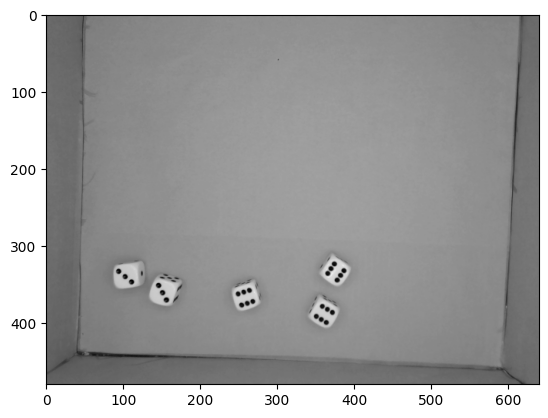

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


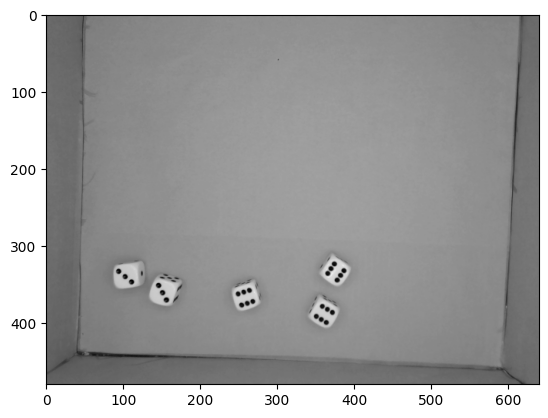

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


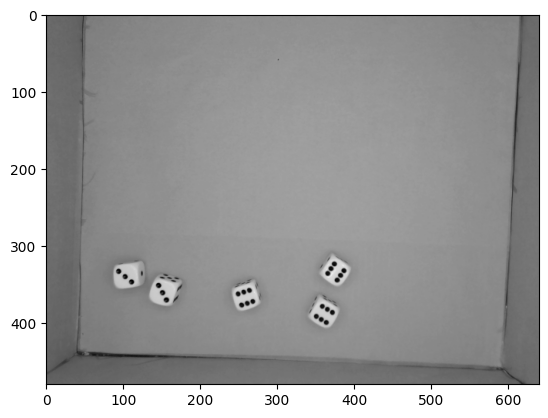

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


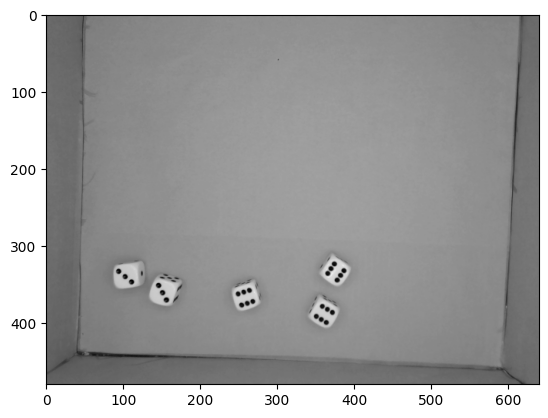

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


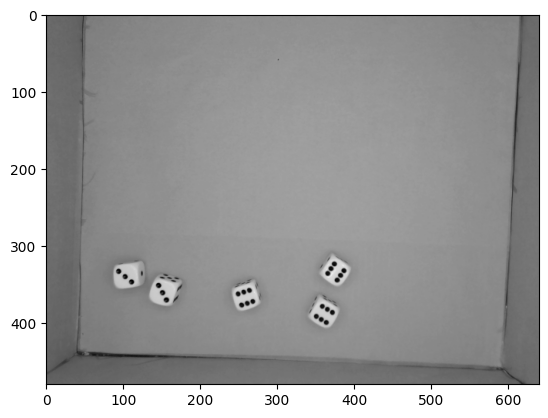

score 0.388235294117647 difference 0.0
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


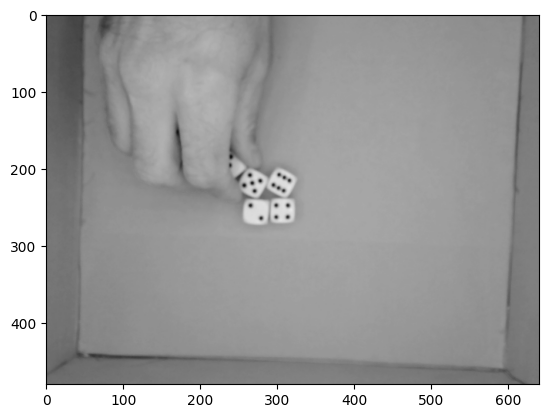

score 0.32156862745098036 difference 36.30215417216295
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


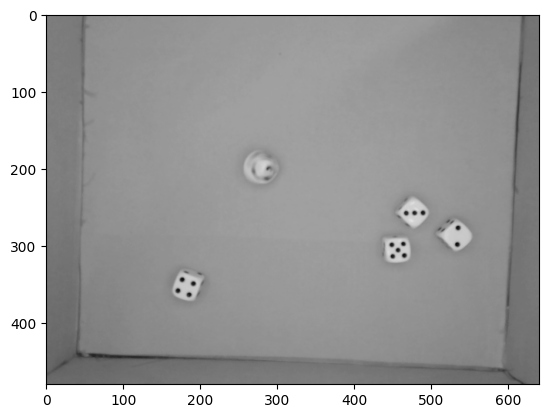

score 0.3176470588235295 difference 32.62339317716098
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


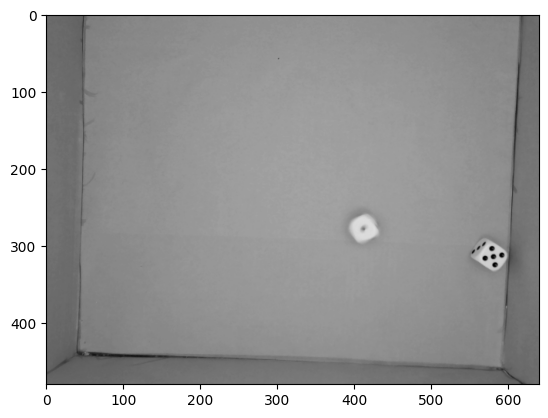

score 0.30980392156862746 difference 23.157921976073215
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


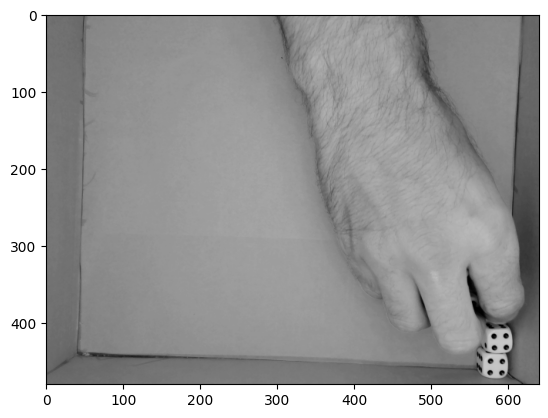

score 0.2588235294117648 difference 39.585216017878764
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False
-------------------------------------------------- new frame below


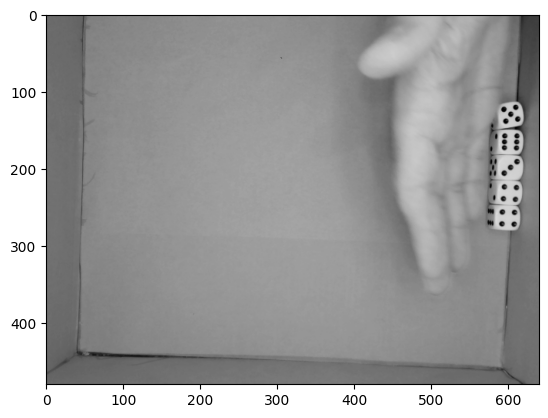

score 0.3058823529411765 difference 53.98034372482756
deque(['empty', 'empty', 'empty', 'empty'], maxlen=4)
Current State: empty Capture: False


In [10]:
# create test sequence # 5 empty  5 rolling 5 still 5 rolling
testlist=gray_images_empty[:5]+gray_images_rolling[:5]+[np.copy(gray_images_still[10]) for _ in range(10)]+gray_images_rolling[5:10]


##TODO  test edge and corner cases and test with a video stream..

detector = SceneStateDetector1(calibration_file='configuration/state_calibration.json', max_frames_stack=4)

for frame in testlist:  # Replace with your actual camera stream loop
    print("-------------------------------------------------- new frame below")
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    state,im_capture = detector.get_scene_state(frame)
    print(detector.queue)
    print("Current State:", state, "Capture:", im_capture)
